# ATS 655 HW 1
Tyler Barbero | Date: 1/26/22
### Collaborators: 
- Mandy Bowden, Andrey Marsavin, Ivy Glade, Olivia Sablan, Anindita Chakrabortys, James Larson, Spencer Jones

# Problem 0: Time Management
Estimate of Time to Completion: 10 hrs | Maximum Allotted Time to Completion: 10 hrs | Actual Time to Completion: 6 hrs

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import xarray as xr

# niceities 
# https://matplotlib.org/3.1.1/gallery/ticks_and_spines/major_minor_demo.html
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from fig_params import fig_params
import seaborn as sns
sns.set_style(style="darkgrid")
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# Problem 1: Distributions and Probabilities
**1. Find your own data set with at least 1000 samples (talk to me or the TA if you don’t have any data that fits this requirement). Let’s call this data set Y3.**
- Y1: hourly temp
- Y2: hourly wspd
- Y3: MJO data starts at index 9, 10 ,1, 2, ..., 8 where 9 is 20deg E and 8 ends at 10deg W

In [2]:
# txt = np.genfromtxt('/Users/tbarbero/Desktop/SP22/655/proj_norm_order.ascii.txt',skip_header=2)
txt = np.genfromtxt('/Users/tyler/Desktop/SP22/ATS_655/proj_norm_order.ascii.txt',skip_header=2)

# skip time column 
data = txt[:,1:]
### create a time series for mjo indices
y3 = np.squeeze(np.reshape(data,[1,np.shape(data)[0]*np.shape(data)[1]]));
y3 = y3[~np.isnan(y3)]

### read in y1, y2
with open('/Users/tyler/Desktop/SP22/ATS_655/homework_1_data_Y1.csv','r') as y1:
# with open('homework_1_data_Y1.csv','r') as y1:
    y1 = y1.readlines()
y1 = np.array([float(val) for val in y1])

with open('/Users/tyler/Desktop/SP22/ATS_655/homework_1_data_Y2.csv','r') as y2:
# with open('/Users/tbarbero/Desktop/SP22/655/homework_1_data_Y2.csv','r') as y2:
    y2 = y2.readlines()
y2 = np.array([float(val) for val in y2])


**2. Standardize the three time series (Y1, Y2, Y3) and plot estimates of their probability density functions on the same plot. Use a bin size of 0.2 standard deviations and give the y-axis units of density.**

In [3]:
y1standard = (y1-np.mean(y1))/np.std(y1)
y2standard = (y2-np.mean(y2))/np.std(y2)
y3standard = (y3-np.mean(y3))/np.std(y3)
# calculate pdf
hy1 = np.histogram(y1standard,np.arange(-4,4,0.2))
hy2 = np.histogram(y2standard,np.arange(-6,6.2,0.2));
hy3 = np.histogram(y3standard,np.arange(-4,4.2,0.2))

xinc = 0.2

In [4]:
[np.sum(hy1[0]/np.size(y1)*xinc), np.sum(hy2[0]/np.size(y2)*xinc)]

[0.2, 0.19998858447488588]

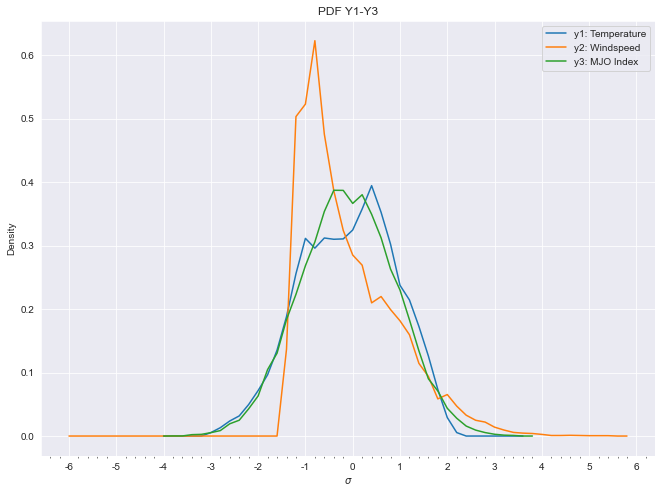

In [5]:
# plot estimates of pdf on same plot
fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(111)

density_y1 = hy1[0]/(np.size(y1)*xinc)
density_y2 = hy2[0]/(np.size(y2)*xinc)
density_y3 = hy3[0]/(np.size(y3)*xinc)


# divide counts by size of dataset or 'frequency'
# divide by frequency by bin width to get 'density'
plt.plot(hy1[1][:-1],density_y1,label='y1: Temperature')
plt.plot(hy2[1][:-1],density_y2,label='y2: Windspeed')
plt.plot(hy3[1][:-1],density_y3,label='y3: MJO Index')
plt.legend();plt.ylabel('Density');plt.xlabel(r'$\sigma$');
plt.title('PDF Y1-Y3')
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.tick_params(axis='x', which='minor', bottom=True)
plt.minorticks_on()

In [6]:
# check that data under curve sums to 1
[np.sum(density_y1)*xinc, np.sum(density_y2)*xinc, np.sum(density_y3)*xinc]
# close enough

[1.0, 0.9999429223744292, 0.9998755832037326]

**3. Create a 4th time series, called Z, that has a length of 100,000 and is created from 100,000 samples of
a standard normal distribution. Plot the probability density function of Z on the same plot as that of
Y1, Y2, Y3 using the same bin increment. Which of the Y time series look like the normal distribution
Z? Which do not?**

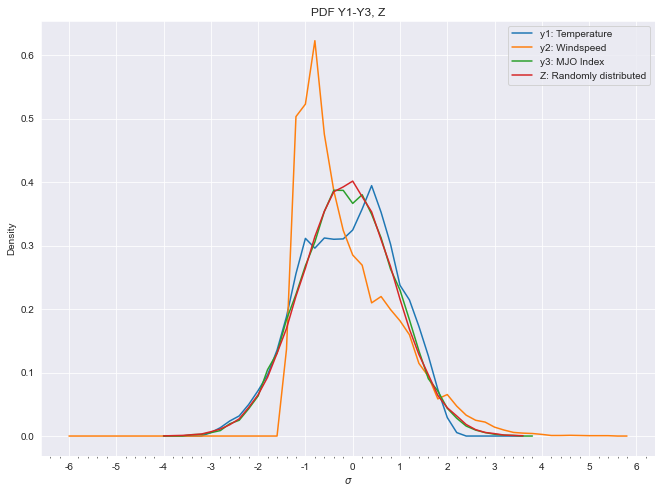

In [7]:
# np.random.normal samples from gaussian distribution
Z = np.random.normal(0,1,size=100000) # 0=mu 1=std.dev.
hZ = np.histogram(Z,np.arange(-4,4,0.2))

fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(111)

density_Z = hZ[0]/(np.size(Z)*xinc)

# divide counts by size of dataset to get 'density' or 'frequency'
plt.plot(hy1[1][:-1],density_y1,label='y1: Temperature')
plt.plot(hy2[1][:-1],density_y2,label='y2: Windspeed')
plt.plot(hy3[1][:-1],density_y3,label='y3: MJO Index')
plt.plot(hZ[1][:-1],density_Z,label='Z: Randomly distributed')
plt.legend();plt.ylabel('Density');plt.xlabel(r'$\sigma$');
plt.title('PDF Y1-Y3, Z')
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.tick_params(axis='x', which='minor', bottom=True)
plt.minorticks_on()

In [8]:
#Check Z
[np.sum(density_Z)*xinc]

[0.9999199999999999]

- Y1 (temperature) and Y3 (MJO ind) look very similar to the Z (gaussian) time series, moreso Y3 though. Y2 (wspd) does not look like Z at all, rather it looks chi-squared distributed, where most of the density is positively skewed with a longer tail to the right.

**4. For each of the four standardized time series, answer the following question: What is the probability
that any one particular measurement is +2 standard deviations or greater? What physical value does
a standardized value of +2 standard deviations correspond to for the Yis?**

In [9]:
# +2 std or greater -> 1-Pr(x<+2)
# sum up pdf under curve
pr_y1 = hy1[0]/np.size(y1)
pr_y2 = hy2[0]/np.size(y2)
pr_y3 = hy3[0]/np.size(y3)
pr_Z = hZ[0]/np.size(Z)

ind1 = np.abs(hy1[1]-2).argmin()
ind2 = np.abs(hy2[1]-2).argmin()
ind3 = np.abs(hy3[1]-2).argmin()
ind4 = np.abs(hZ[1]-2).argmin()

pr1 = 1 - np.sum(pr_y1[0:ind1])
pr2 = 1 - np.sum(pr_y2[0:ind2])
pr3 = 1 - np.sum(pr_y3[0:ind3])
pr4 = 1 - np.sum(pr_Z[0:ind4])

pval1 = np.mean(y1)+np.std(y1)*2
pval2 = np.mean(y2)+np.std(y2)*2
pval3 = np.mean(y3)+np.std(y3)*2
pval4 = np.mean(Z)+np.std(Z)*2

print('Probability that one measurement is greater than +2 standard deviations:')
print('y1: ',round(pr1,4),'%.', 'Physical value of:',pval1,'F')
print('y2: ',round(pr2,4),'%.', 'Physical value of:',pval2,'m/s')
print('y3: ',round(pr3,4),'%.', 'Physical value of:',pval3,'MJO index')
print('Z: ',round(pr4,4),'%.', 'Physical value of:',pval4,'[units of std. normal dist]')

Probability that one measurement is greater than +2 standard deviations:
y1:  0.0069 %. Physical value of: 90.25541286193835 F
y2:  0.0476 %. Physical value of: 8.092267297015471 m/s
y3:  0.0216 %. Physical value of: 1.9661125985910883 MJO index
Z:  0.0234 %. Physical value of: 2.0009952821662726 [units of std. normal dist]


**5. Imagine you go out today and measure the wind speed (Y2) and you obtain a standardized value of +3
standard deviations. How rare of an event is this (how often does a value of +3 or more occur)? How
rare would you think this event was if you erroneously assumed that wind speed followed a normal
distribution?**

In [10]:
ind = np.abs(hy2[1]-3).argmin()
ans = 1-np.sum(pr_y2[0:ind])
print('Probability of a wind speed value being >= 3 std devs',round(ans,4),'%')
print('By looking at the Z-table, we found a probability (rarity) of 0.0013%')

Probability of a wind speed value being >= 3 std devs 0.0092 %
By looking at the Z-table, we found a probability (rarity) of 0.0013%


- If we assumed wind speed followed a normal distribution, then the probability of getting a value being >= 3 std devs is 0.3%.

**6. Provide a few sentences about your data (Y3) and what you have learned about its distribution and
what this may tell you about the processes at play.**
 - By looking at the pdf for Y3, it looks pretty gaussian which makes sense because the data is a MJO index around 0 with positive values indicating a positively convective phase and negative values indicating a suppressive phase. This suggests that the MJO changes between physical modes of convection and supression.

# Problem 2: Central Limit Theorem and N
- For this problem, please use standardized versions of the four time series (Z, Y1, Y2, Y3) from Problem 1.
- Over the next few weeks, you go out and collect a sample of N measurements, one sample for each time series. You find that the mean of each sample is −0.35 standard deviations. You wonder: How rare is a value of −0.35? Your goal is to quantify the “rarity” of getting a sample mean as extreme as −0.35 for the four time series as a function of the sample length N (letting N vary between 5 and 60 in increments of 5).

In [11]:
sample_means = np.zeros([4,10000])
data = [y1standard,y2standard,y3standard,Z]
for i in np.arange(0,4):
    ts = data[i]
    for j in np.arange(0,10000):
        tmp = np.random.choice(ts,size=20)
        sm = np.mean(tmp)
        sample_means[i,j] = sm

**1. Plot estimates of the probability density functions of the sample means for the four time series for N = 20.**

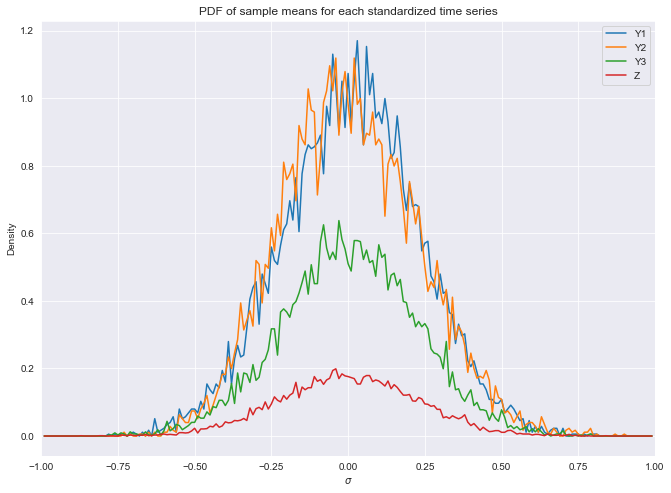

In [12]:
hy1 = np.histogram(sample_means[0,:],np.arange(-1,1,0.01))
hy2 = np.histogram(sample_means[1,:],np.arange(-1,1,0.01))
hy3 = np.histogram(sample_means[2,:],np.arange(-1,1,0.01))
hy4 = np.histogram(sample_means[3,:],np.arange(-1,1,0.01))
xinc = 0.01

fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(111)

plt.plot(hy1[1][1:],hy1[0]/(xinc*np.size(y1standard)),label='Y1')
plt.plot(hy2[1][1:],hy2[0]/(xinc*np.size(y2standard)),label='Y2')
plt.plot(hy3[1][1:],hy3[0]/(xinc*np.size(y3standard)),label='Y3')
plt.plot(hy4[1][1:],hy4[0]/(xinc*np.size(Z)),label='Z')
plt.xlim([-1,1])
plt.title('PDF of sample means for each standardized time series');
plt.legend();plt.xlabel(r'$\sigma$');plt.ylabel('Density');

In [13]:
# check PDF sum to 1 for each PDF
print(np.sum(hy1[0]/10000))
print(np.sum(hy2[0]/10000))
print(np.sum(hy3[0]/10000))
print(np.sum(hy4[0]/10000))

1.0
0.9999
1.0
1.0


**2. Plot the frequency of the sample mean being <= −0.35 as a function of N for the four time series.**

In [14]:
sample_means = np.zeros([4,10000])
data = [y1standard,y2standard,y3standard,Z]
names = ['y1standard','y2standard','y3standard','Z']
prob_array = np.zeros([4,12])

for i in np.arange(0,4):
    ts = data[i]
    k = 0
    for N in np.arange(5,65,5):
        for j in np.arange(0,10000):
            tmp = np.random.choice(ts,size=N)
            sm = np.mean(tmp)
            sample_means[i,j] = sm

        # calculate frequency of sample mean < -0.35
        hist = np.histogram(sample_means[i,:],np.arange(-2,2,0.05))
        ind = np.abs(hist[1]-(-0.35)).argmin()
        prob = np.sum(hist[0][0:ind]/np.size(ts))
        
        prob_array[i,k] = prob
        k+=1

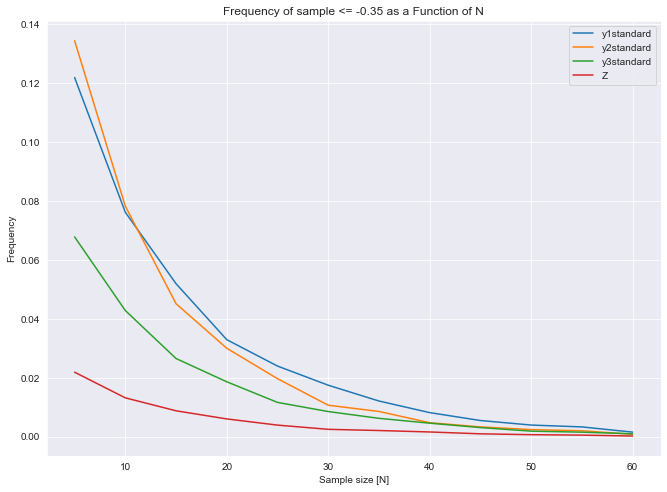

In [15]:
fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(111)

for i in np.arange(0,4):
    plt.plot(np.arange(5,65,5),prob_array[i,:],label=names[i])
plt.legend()
plt.xlabel('Sample size [N]');plt.ylabel('Frequency')
plt.title('Frequency of sample <= -0.35 as a Function of N');

**3. Do the approximate probability density functions of the different time series look the same? Different? Why?**
 - Y1 and Y2 look similar while Y3 is flatter and Z is even flatter in shape. I think this is due to the different sizes of the data arrays. Y1,Y2 are 17520 in size. Y3 is 32150 in size and Z is 100,000. 

**4. What has this exercise shown you about assuming gaussian statistics for sample means?**
 - This showed me that when sampling a dataset of any underlying distribution to get a sample means that are normally distributed, this largely depends on the N. As N->Large, the probabilty of sample means becomes more narrow and we are more confident that our sample mean is the true population mean. In other words, we see a smaller probility (higher rarity) of getting a sample mean <= -0.35 as N->Large vs N->small.

# Problem 3: Application to Climate Data

In [16]:
ds1 = xr.open_dataset('/Users/tyler/Desktop/SP22/ATS_655/TS_timeseries_cesmle_1850.nc')
ds2 = xr.open_dataset('/Users/tyler/Desktop/SP22/ATS_655/TS_timeseries_cesmle_1920_2100.nc')

**1. Use the 1850 control run to calculate population statistics (e.g. mean and variance) in the absence of
climate change. Plot a histogram of the data. Do you think that this distribution is Gaussian?**

mean:  287.105224609375 T
std:  0.10361006110906601 T


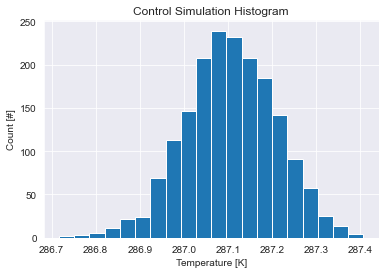

In [17]:
mean = np.mean(ds1.gts_annual);print('mean: ',float(mean),'T')
stddev = np.std(ds1.gts_annual);print('std: ',float(stddev),'T')
plt.hist(ds1.gts_annual,bins=20);plt.xlabel('Temperature [K]');plt.ylabel('Count [#]');plt.title('Control Simulation Histogram');

- Yes, this data looks to be approximately gaussian distributed!

**2. Plot the time series from the control data as well as a time series of the global mean temperature from
the first ensemble member.**

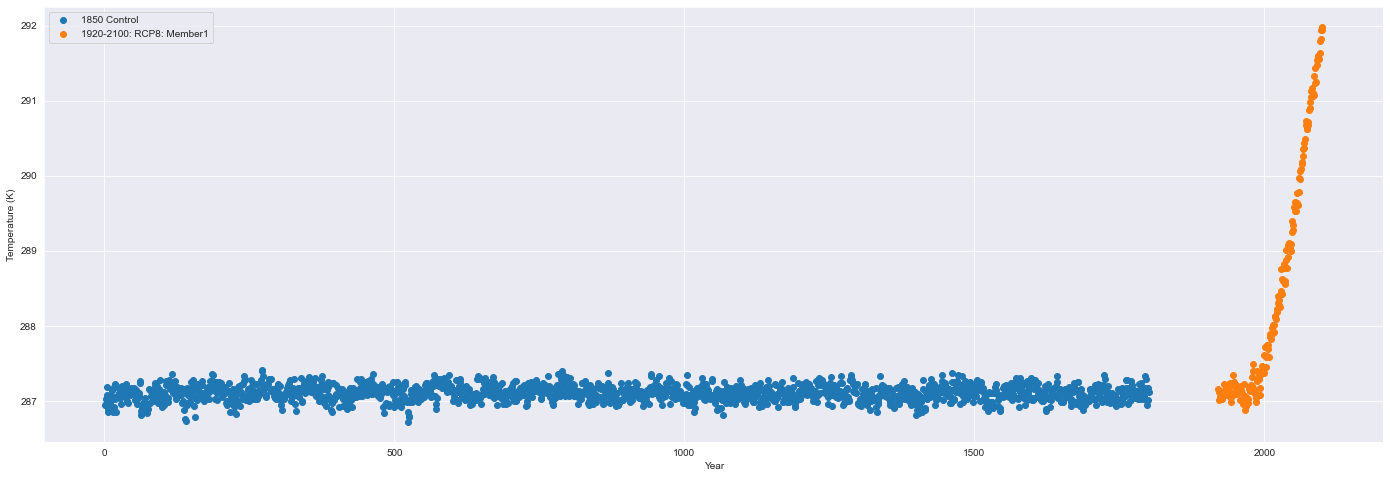

In [18]:
fig = plt.figure(figsize=(24,8))
ax = fig.add_subplot(111)
plt.scatter(ds1.year,ds1.gts_annual,label='1850 Control')
plt.scatter(ds2.year,ds2.gts_ann_allcesmle[1,:],label='1920-2100: RCP8: Member1')
plt.legend();plt.ylabel('Temperature (K)');plt.xlabel('Year');

**3. Estimate present-day global warming in the first ensemble member by calculating the global mean
temperature over 1990-2019 (30 years).**

In [19]:
ind1 = int(np.abs((ds2.year-1990)).argmin())
ind2 = int(np.abs((ds2.year-2019)).argmin())
glb_warming_temp = np.mean(ds2.gts_ann_allcesmle[0,ind1:ind2])
print(round(float(glb_warming_temp),4),'deg F')

287.655 deg F


**4. Under the assumption that there is no global warming ($H_o$), that is, the 1850 control run and the climate
change simulations are drawn from the same climate, how odd is a 30-year mean temperature as the
one you calculated in the step above?**


- To explore this question, you will want to “resample” the control simulation over and over again in
order to obtain the distribution of the sample means of length 30 years under the assumption of no
global warming. Write code that grabs 30 year consecutive chunks and calculates their means, and
stores these values in a vector. When the loop is complete, you will have a vector of ∼ 59 sample means
from the control run, and **you can compare the distribution under the 1850 control climate to what
you actually calculated from the climate change simulation.**

In [20]:
avg_temps = np.zeros(int(len(ds1.year)/30)+1)
j=0
for i in np.arange(0,len(ds1.year),30):
    if i==0:
        tmp = np.mean(ds1.gts_annual[i:i+29])
#         print(int(ds1.year[i]),int(ds1.year[i+29]))
    else:
        tmp = np.mean(ds1.gts_annual[i:i+29])
#         print(int(ds1.year[i]),int(ds1.year[i+29]))
    avg_temps[j] = tmp
    j+=1
# avg_temps

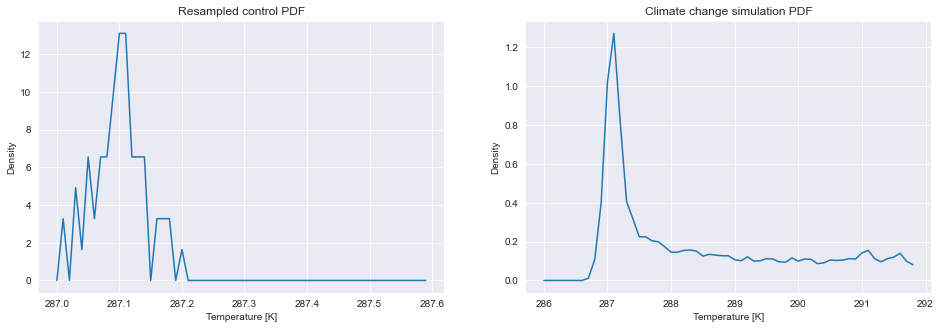

In [21]:
tmp1 = np.histogram(avg_temps,np.arange(287.0,287.6,0.01))
fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(121)
plt.plot(tmp1[1][:-1],tmp1[0]/(np.size(avg_temps)*.01));
plt.xlabel('Temperature [K]');
plt.ylabel('Density');
plt.title('Resampled control PDF')
ax = fig.add_subplot(122)
tmp2 = np.histogram(ds2.gts_ann_allcesmle,np.arange(286,292,0.1))
plt.plot(tmp2[1][:-1],tmp2[0]/(np.size(ds2.gts_ann_allcesmle[:,:])*.1));
plt.title('Climate change simulation PDF');
plt.xlabel('Temperature [K]');
plt.ylabel('Density');

In [22]:
zscore = (glb_warming_temp - np.mean(avg_temps))/np.std(avg_temps);
print('Z-score: ',float(zscore))
p_values = scipy.stats.norm.sf(abs(zscore)) #one-sided
print('P-value: Probability of getting a Z-score of 13.24 or greater ', p_values)
# This is very small!

Z-score:  13.241596277477722
P-value: Probability of getting a Z-score of 13.24 or greater  2.523235480037526e-40


**How odd is a 30-year mean temperature as the one you calculated in the step above?**
- The global mean temperature in the first ensemble of the climate change simulation is 287.6 deg K. The distribution of the resampled 30-year mean temperatures from the control run is plotted above. To see how odd the 30-year mean temperature in climate simulation ensemble 1 is to the control simulation, we can do a Z-score to see how far the value is from the distribution of the control run data. We see that getting a value of 287.6 deg K from the climate change simulation in the resampled control PDF distribtuion is about a standard deviation of 13.2. The p-value for this (one-sided) is 2.5e-40.

**5. It is always possible to draw a sample with a statistic that is at the extreme end. That is, even if global
warming is not real, it is still possible to draw a single sample of a 30-year period with a very large
temperature (even if very unlikely). Your analysis above only involved one ensemble member, and
perhaps was just an unlikely fluke. Perform the same calculation for the other 29 ensemble members.
How much more confident are you that your null hypothesis that global warming is not real (i.e.
all simulations are drawn from a control, unforced climate) can be rejected? Why? Try and be as
quantitative as possible.**

In [23]:
temp_array = np.zeros(30)
ind1 = int(np.abs((ds2.year-1990)).argmin())
ind2 = int(np.abs((ds2.year-2019)).argmin())
for i in np.arange(0,30):

    glb_warming_temp = np.mean(ds2.gts_ann_allcesmle[i,ind1:ind2])
    temp_array[i] = glb_warming_temp
temp_array

array([287.65499878, 287.6317749 , 287.63485718, 287.61746216,
       287.66610718, 287.64923096, 287.61764526, 287.64248657,
       287.671875  , 287.62185669, 287.64099121, 287.67871094,
       287.71191406, 287.56417847, 287.64004517, 287.60018921,
       287.69122314, 287.67736816, 287.6842041 , 287.62661743,
       287.60736084, 287.69171143, 287.62661743, 287.62719727,
       287.63302612, 287.62823486, 287.66958618, 287.62741089,
       287.6427002 , 287.60098267])

- Looking at this array, it seems the global mean temperature values for each member is above 287.6 degrees F. [Nick Falk's reasoning from class] If we treat each simulation as an independent event which is valid because one simulation does not affect one another once it is run, we can treat this as the probability of getting a global mean temperature of 287.6 (all simulations are ~287.6 to the first decimal), 30 times in a row. The probability would be $(p-value)^{40}$ = $(2.5e-40)^{40}$ which is extremely small. Therefore, I am much more confident that the null hypothesis global warming is not real can be rejected.